<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 1px; height: 3px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [953]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline
plt.style.use('fivethirtyeight')

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [885]:
import pprint

# Read CSV file
with open('sat_scores.csv','rU') as f:
    reader = list(csv.reader(f))

# Obtain header names from 1st row
reader_header = list(reader[0])

In [886]:
# Obtain data from remaining rows
reader_data = list(reader[1:])

# Transpose reader_data
reader_data_t = [list(i) for i in zip(*reader_data)]

In [887]:
# Create Dictionary from reader_header and reader_data_t
sat_scores_dict = {k:v for k,v in zip(reader_header,reader_data_t)}

In [1104]:
sat_scores_dict

{'Math': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [889]:
# Create dictionary from Pandas
df1 = pd.DataFrame.from_dict(sat_scores_dict)
df1.head()

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520


In [890]:
df1.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [891]:
df2 = pd.read_csv('sat_scores.csv')

In [892]:
df2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### Ans for 1.2 - The data type of which the numeric data is being stored as is different.

1. Pandas - as integers
2. CSV Loading - as strings

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [893]:
df2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [894]:
df2.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [895]:
df2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [896]:
# Define Descriptions
description_list = ['Name of the State',
                   'Avg Score Rate',
                   'Score from Verbal Test',
                   'Score from Math Test']

In [897]:
df2.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

In [898]:
# Create dictionary with Column Names as keys with their type and description as values

Columns={}
for e in df2.columns:
    Columns[e] = {}
    for i,f in enumerate(Columns):
        Columns[e]['type'] = df2.dtypes[i]
        Columns[e]['description'] = description_list[i]
Columns

{'Math': {'description': 'Score from Math Test', 'type': dtype('int64')},
 'Rate': {'description': 'Avg Score Rate', 'type': dtype('int64')},
 'State': {'description': 'Name of the State', 'type': dtype('O')},
 'Verbal': {'description': 'Score from Verbal Test', 'type': dtype('int64')}}

In [899]:
df2.shape

(52, 4)

In [900]:
# Create data dictionary by inserting columns dictionary and shape

data_dict = {}

data_dict['Columns'] = Columns
data_dict['Shape'] = df2.shape

In [901]:
pprint.pprint(data_dict)

{'Columns': {'Math': {'description': 'Score from Math Test',
                      'type': dtype('int64')},
             'Rate': {'description': 'Avg Score Rate',
                      'type': dtype('int64')},
             'State': {'description': 'Name of the State',
                       'type': dtype('O')},
             'Verbal': {'description': 'Score from Verbal Test',
                        'type': dtype('int64')}},
 'Shape': (52, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [955]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

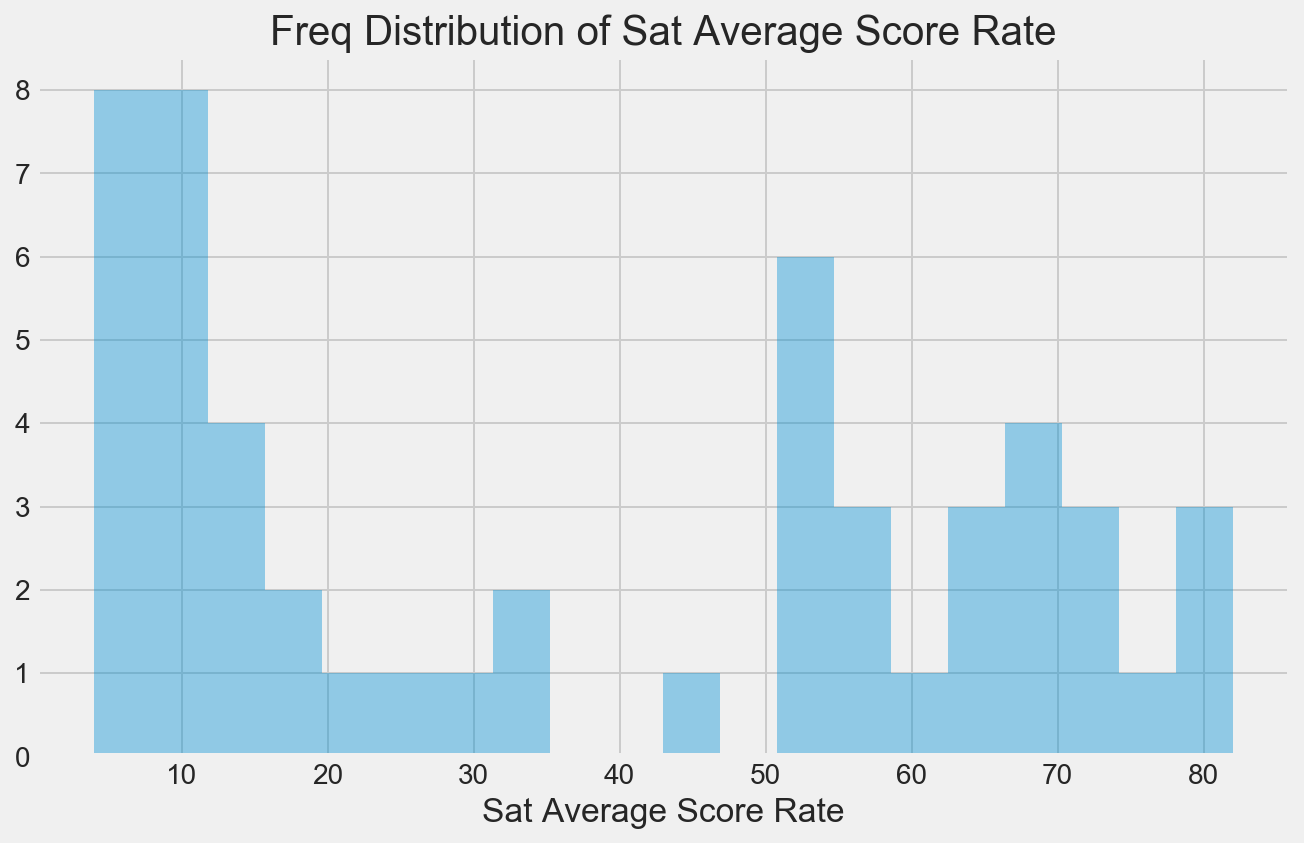

In [956]:
fig, ax = plt.subplots(figsize=(10,6))
rate_dist = sns.distplot(df2['Rate'],bins=20,kde=False,axlabel='Sat Average Score Rate')
rate_dist.set_title('Freq Distribution of Sat Average Score Rate')
rate_dist.plot(figsize=(12,8))

[]

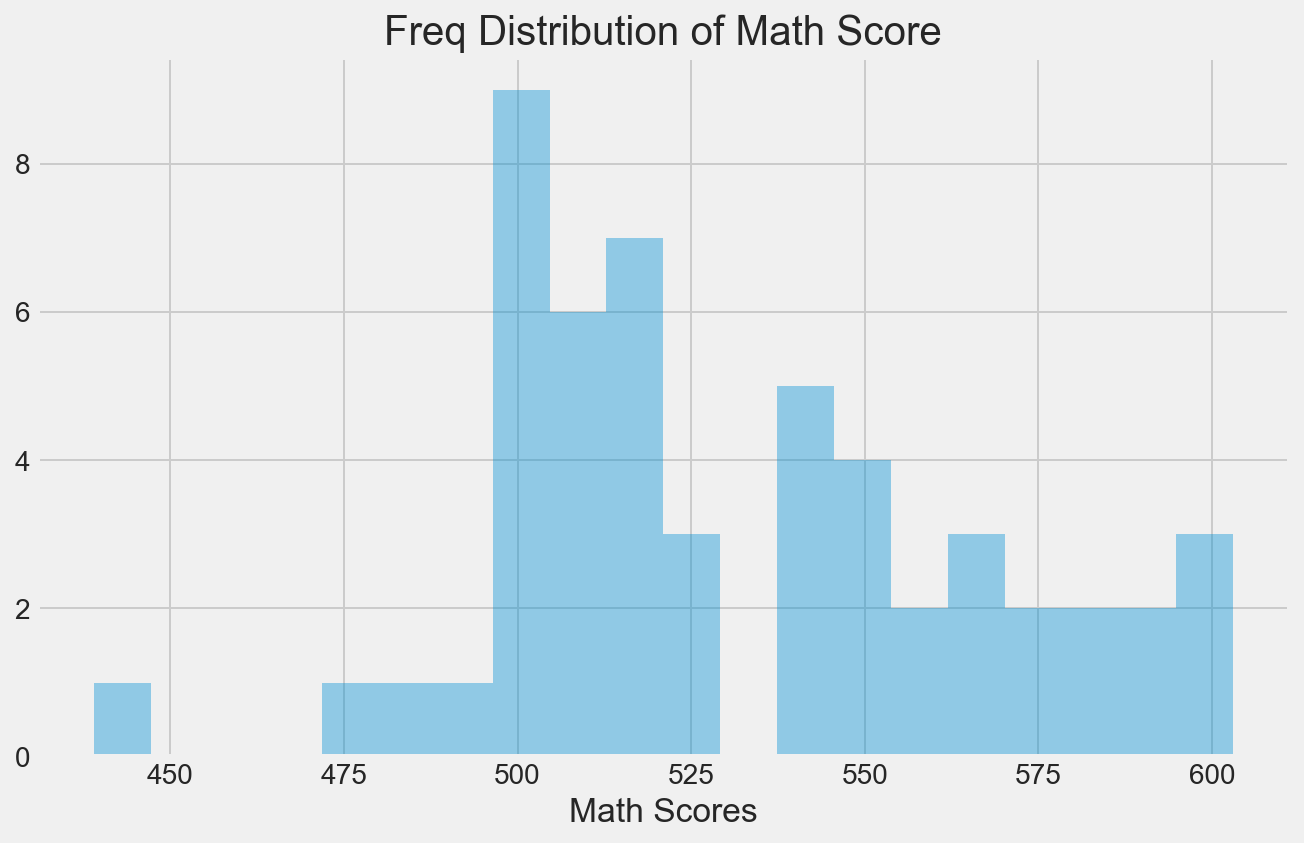

In [1095]:
fig, ax = plt.subplots(figsize=(10,6))
Math_graph = sns.distplot(df2['Math'],bins=20,kde=False,axlabel='Math Scores')
Math_graph.set_title('Freq Distribution of Math Score')
Math_graph.plot(figsize=(12,8))

[]

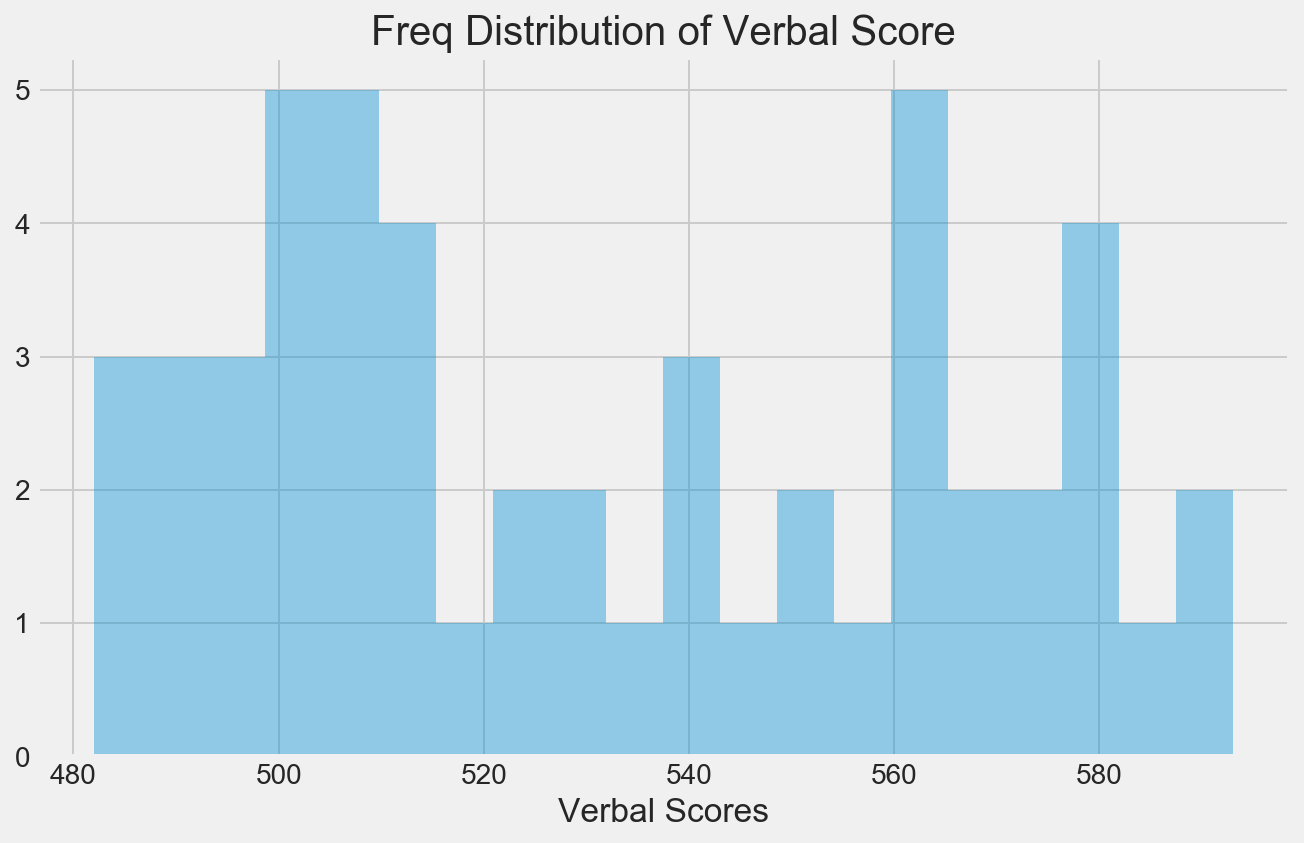

In [905]:
fig, ax = plt.subplots(figsize=(10,6))
Verbal_graph = sns.distplot(df2['Verbal'],bins=20,kde=False,axlabel='Verbal Scores')
Verbal_graph.set_title('Freq Distribution of Verbal Score')
Verbal_graph.plot(figsize=(12,8))

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

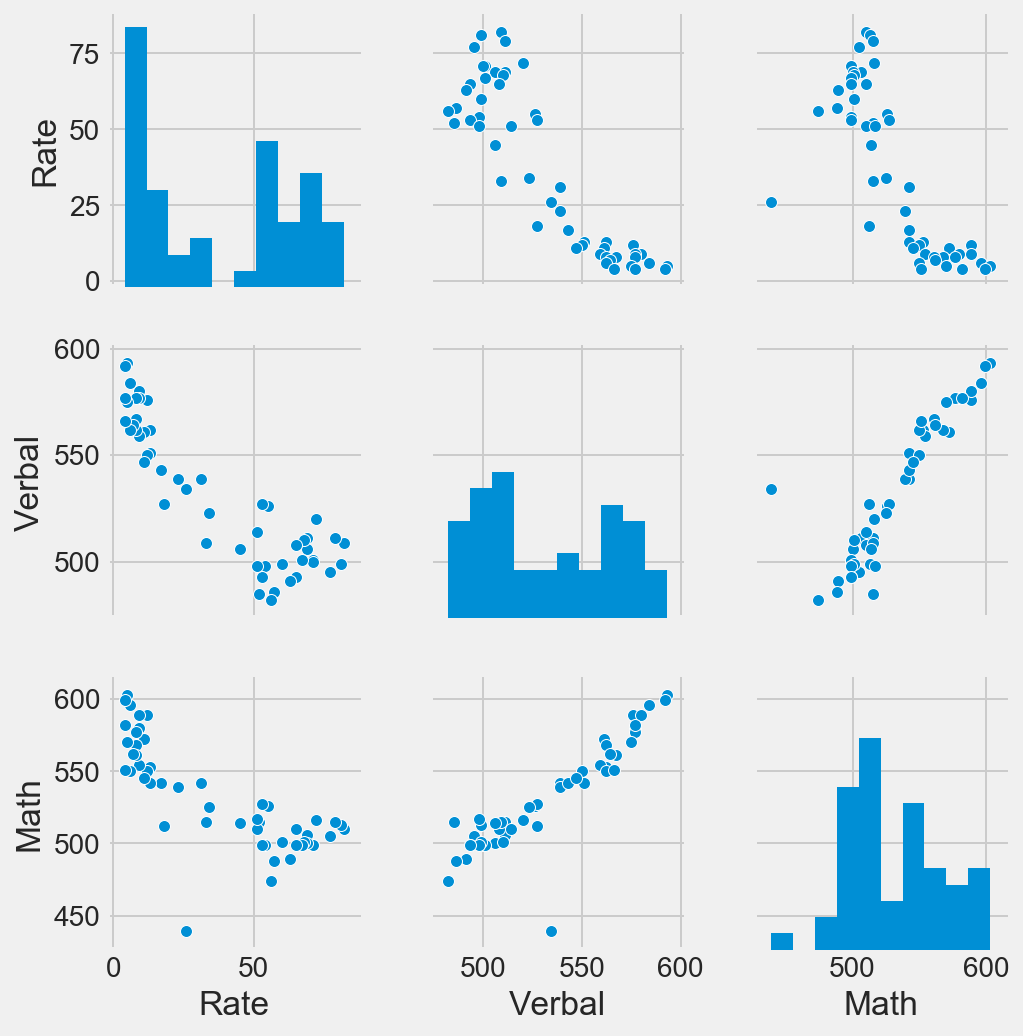

In [906]:
df_pairplot = sns.pairplot(df2)

### And 3.2 Correlation Relationships

1. Negative correlation relationship - Rate vs Verbal/Math Scores
2. Positive correlation relationship - Verbal vs Math Scores

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [907]:
import matplotlib.pyplot as plt

Text(0.5,1,'Stacked histogram of Verbal and Math')

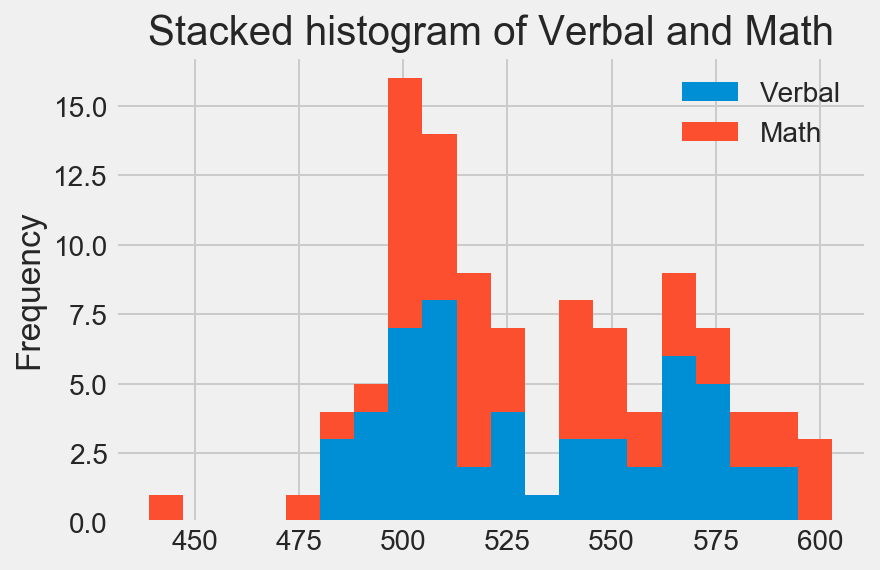

In [1112]:
Hist = df2[['Verbal','Math']].plot.hist(bins=20,stacked=True)
Hist.set_title('Stacked histogram of Verbal and Math')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

### Ans 4.2a - Boxplot provides a quicker and more precise assessment of the following:

1. Median
2. 25th and 75th Percentiles
3. Min and Max Value
4. Outliers

### Ans 4.2b - Rate uses a different scale compared to Math and Verbal

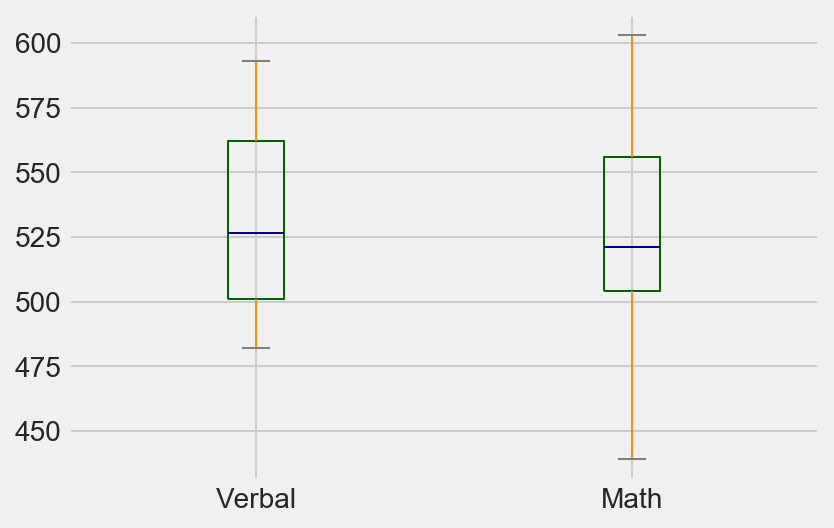

In [909]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df2[['Verbal','Math']].plot.box(color=color,sym='r+')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


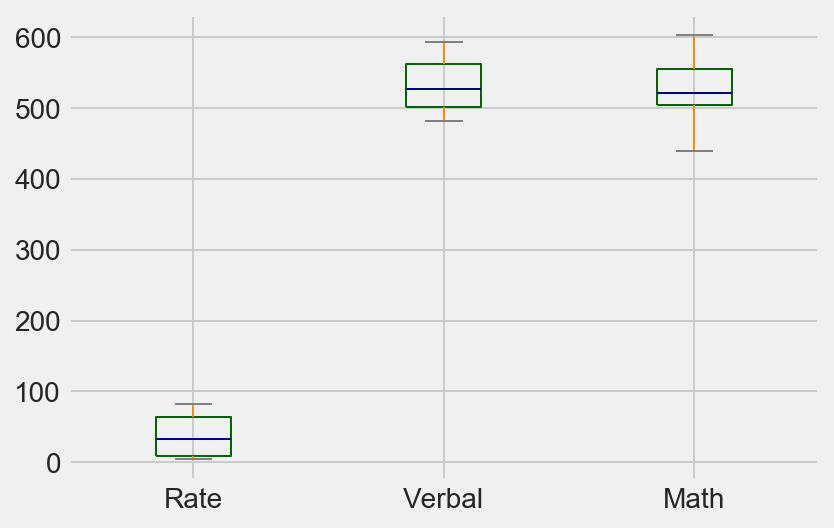

In [910]:
df2.plot.box(color=color,sym='r+')

In [911]:
df3 = df2[['Verbal','Math','Rate']]

In [912]:
df3_stand = (df3 - df3.mean()) / df3.std()

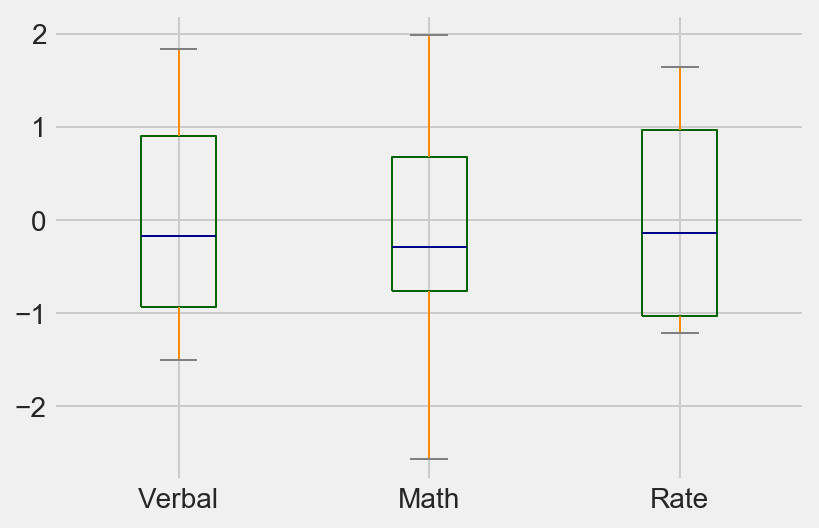

In [913]:
df3_stand.plot.box(color=color,sym='r+')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [914]:
df2['Verbal'].mean()

532.0192307692307

In [915]:
df2[df2['Verbal'] > df2['Verbal'].mean()].head()

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553


In [916]:
df2.count()

State     52
Rate      52
Verbal    52
Math      52
dtype: int64

In [917]:
df2[df2['Verbal'] > df2['Verbal'].mean()].count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [918]:
df2['Verbal'].median()

526.5

In [919]:
df2[df2['Verbal'] > df2['Verbal'].median()].head()

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512


In [920]:
df2[df2['Verbal'] > df2['Verbal'].median()].count()

State     26
Rate      26
Verbal    26
Math      26
dtype: int64

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [921]:
df2['Diff_V_M'] = df2['Verbal'] - df2['Math']

In [922]:
df2.head()

,State,Rate,Verbal,Math,Diff_V_M
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [923]:
Diff_V_M = df2.sort_values(['Diff_V_M'],ascending=[False]).head(10)

In [924]:
Diff_M_V = df2.sort_values(['Diff_V_M'],ascending=[True]).head(10)

In [925]:
pprint.pprint(Diff_V_M.head(3))

   State  Rate  Verbal  Math  Diff_V_M
27    OH    26     534   439        95
50    MS     4     566   551        15
29    WV    18     527   512        15


In [926]:
pprint.pprint(Diff_M_V.head(3))

   State  Rate  Verbal  Math  Diff_V_M
21    HI    52     485   515       -30
23    CA    51     498   517       -19
1     NJ    81     499   513       -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [927]:
df2.corr()

,Rate,Verbal,Math,Diff_V_M
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diff_V_M,-0.101412,0.052600,-0.388219,1.000000


### Ans 6.1 Correlation Relationships

1. Negative correlation relationship - Rate vs Verbal/Math Scores
2. Positive correlation relationship - Verbal vs Math Scores

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [928]:
df2.describe()

,Rate,Verbal,Math,Diff_V_M
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### Ans 6.2 As follows:

1. Count - Total of 52 data count
2. Mean - Average of each column
3. Std - Standard Deviation of each column
4. Min - Lowest Value of each column
5. 25% - 25th Percentile of each column
6. 50% - 50th Percentile of each column
7. 75% - 75th Percentile of each column
8. Max - Highest Value of each column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

### Ans 6.3

1. The value of correlation takes place between -1 and +1, whereas the value of covariance lies between -∞ and +∞
2. As shown in the formula below
3. Correlation is preferred over covariance, because it remains unaffected by the change in location and scale, and yet ca also be used to make a comparison between two pairs of variables.

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

In [929]:
df2.cov()

,Rate,Verbal,Math,Diff_V_M
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Diff_V_M,-43.552036,27.499623,-219.931373,247.430995


In [930]:
df2.corr()

,Rate,Verbal,Math,Diff_V_M
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diff_V_M,-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [1099]:
# Loading the data into pandas
drug_by_age = pd.read_csv('drug-use-by-age.csv',index_col='age')
drug_by_age.head()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [932]:
drug_by_age.dtypes

n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [933]:
drug_by_age.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


### Observations and required action plan
1. Presence of '-' -> replace '-' with 0
2. Due to 1, caused some columns to be stored as object -> float every figure
3. No missing values

In [934]:
drug_by_age.replace('-',float(0),inplace=True)

In [935]:
drug_by_age.dtypes

n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [936]:
drug_by_age['cocaine-frequency'] = drug_by_age['cocaine-frequency'].apply(lambda x: float(x))
drug_by_age['heroin-frequency'] = drug_by_age['heroin-frequency'].apply(lambda x: float(x))
drug_by_age['inhalant-frequency'] = drug_by_age['inhalant-frequency'].apply(lambda x: float(x))
drug_by_age['oxycontin-frequency'] = drug_by_age['oxycontin-frequency'].apply(lambda x: float(x))
drug_by_age['meth-frequency'] = drug_by_age['meth-frequency'].apply(lambda x: float(x))
drug_by_age['crack-frequency'] = drug_by_age['crack-frequency'].apply(lambda x: float(x))

In [937]:
drug_by_age.dtypes

n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [938]:
drug_by_age.columns

Index([u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [939]:
# Create subset of drug by age containing only % of those in an age group who used drugs in the past 12 months
drug_by_age_use = drug_by_age[['alcohol-use','marijuana-use','cocaine-use',
                              'crack-use','heroin-use','hallucinogen-use',
                              'inhalant-use','pain-releiver-use','oxycontin-use',
                              'tranquilizer-use','stimulant-use','meth-use','sedative-use']]

In [940]:
drug_by_age_use.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


Text(0.5,1,'% of Americans that uses the drug in the past 1 year')

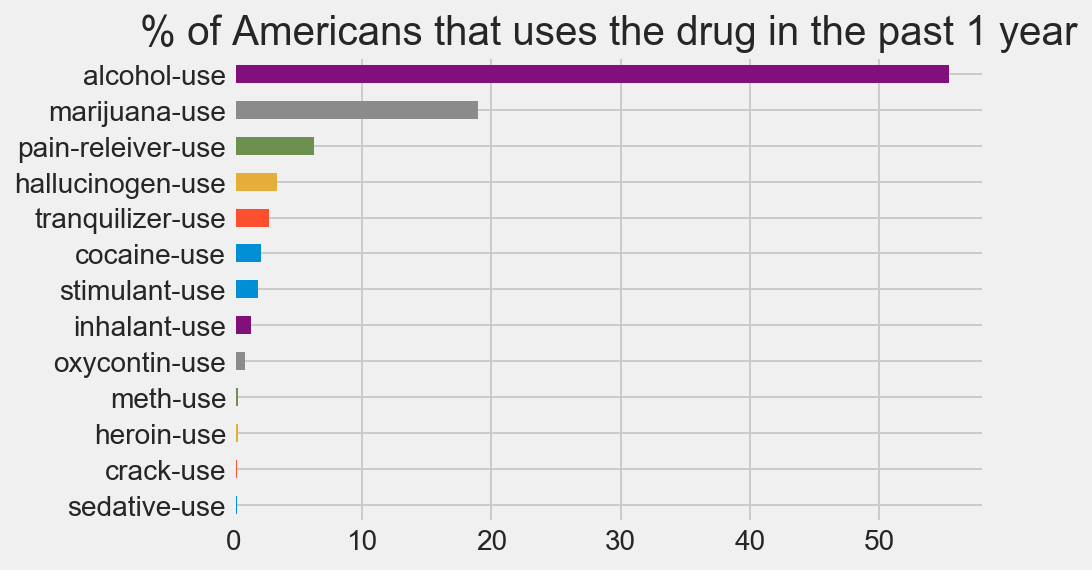

In [957]:
graph1 = drug_by_age_use.mean().sort_values().plot.barh()
graph1.set_title('% of Americans that uses the drug in the past 1 year')

In [947]:
drug_by_age_use_a = drug_by_age_use[['alcohol-use','marijuana-use']]
drug_by_age_use_b = drug_by_age[['cocaine-use',
                              'crack-use','heroin-use','hallucinogen-use',
                              'inhalant-use','pain-releiver-use','oxycontin-use',
                              'tranquilizer-use','stimulant-use','meth-use','sedative-use']]

Text(0.5,1,'% of Groups that uses the drug in the past 1 year')

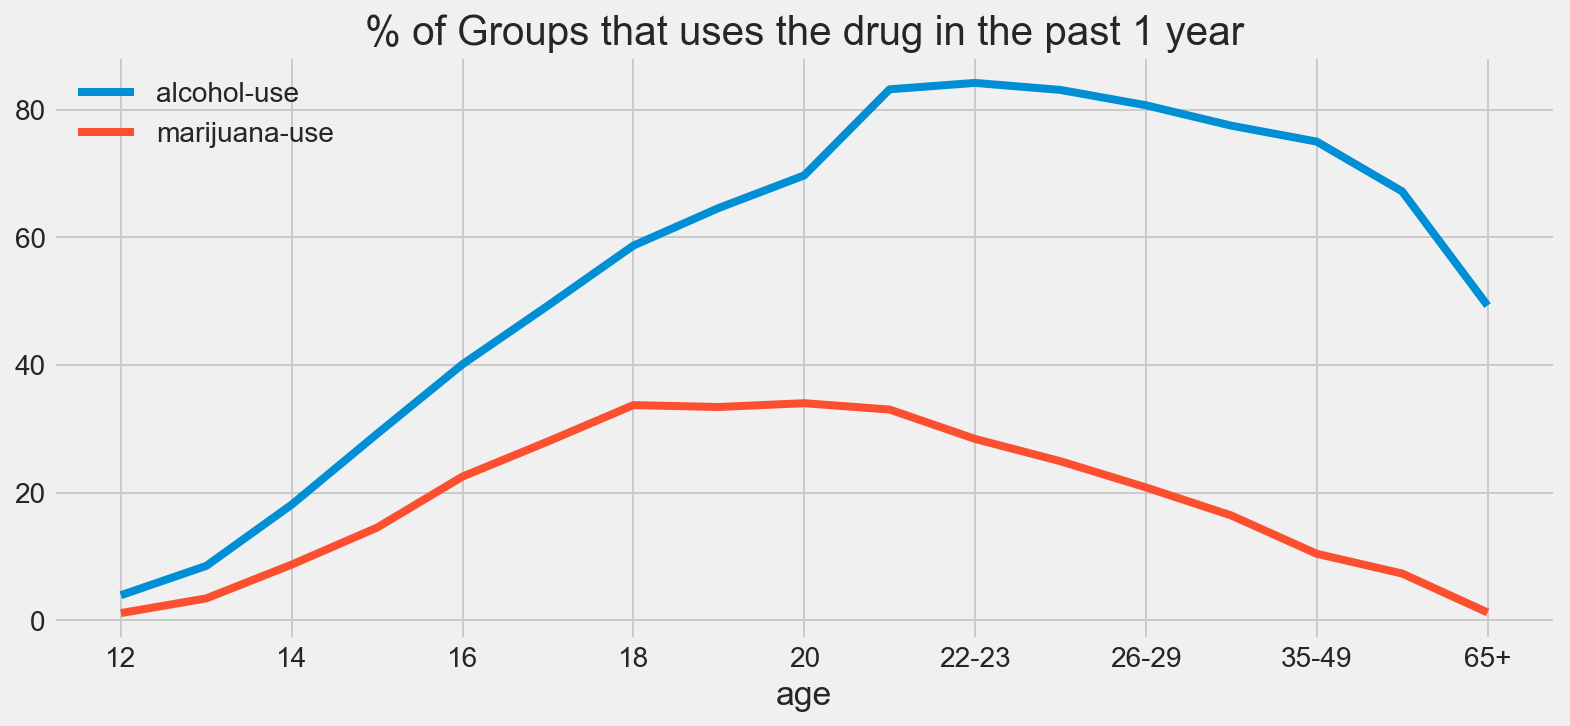

In [988]:
graph2 = drug_by_age_use_a.plot(figsize=(12,5))
graph2.set_title('% of Groups that uses the drug in the past 1 year')

Text(0.5,1,'% of Groups that uses the drug in the past 1 year')

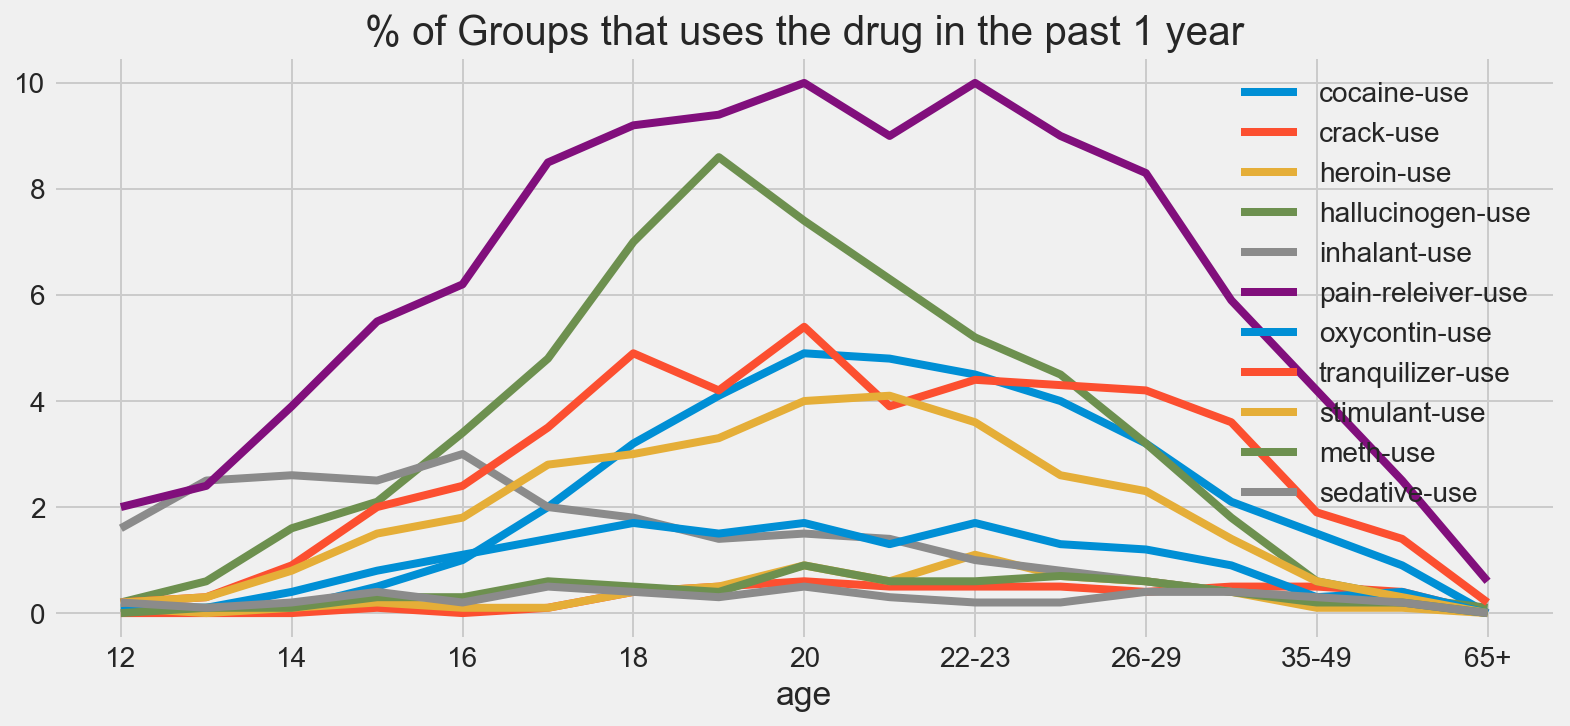

In [1097]:
graph3 = drug_by_age_use_b.plot(figsize=(12,5))
graph3.set_title('% of Groups that uses the drug in the past 1 year')

In [999]:
# Create subset of drug by age containing only the Median frequency of a user in an age group used alcohol in the past 12 months
drug_by_age_freq = drug_by_age[['alcohol-frequency','marijuana-frequency','cocaine-frequency',
                              'crack-frequency','heroin-frequency','hallucinogen-frequency',
                              'inhalant-frequency','pain-releiver-frequency','oxycontin-frequency',
                              'tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]

In [1000]:
drug_by_age_freq.head()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
age,,,,,,,,,,,,,
12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
14,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [1001]:
drug_by_age_freq.describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,42.941176,7.411765,12.382353,68.970588,8.411765,5.794118,14.705882,13.941176,11.735294,31.147059,31.735294,19.382353
std,21.318833,18.362566,8.014119,17.361532,70.153285,15.000245,4.937291,6.935098,12.902134,11.485205,85.973790,32.206423,24.833527
min,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000,4.500000,2.000000,0.000000,3.000000
25%,10.000000,30.000000,5.000000,2.000000,35.500000,3.000000,3.000000,12.000000,5.000000,6.000000,7.000000,10.500000,6.500000
50%,48.000000,52.000000,5.000000,6.000000,50.000000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,24.000000,10.000000
75%,52.000000,52.000000,7.000000,15.000000,66.500000,4.000000,5.500000,15.000000,17.500000,11.000000,12.000000,46.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


Text(0.5,1,'Median of frequency that a user consumes the drug in the past 1 year')

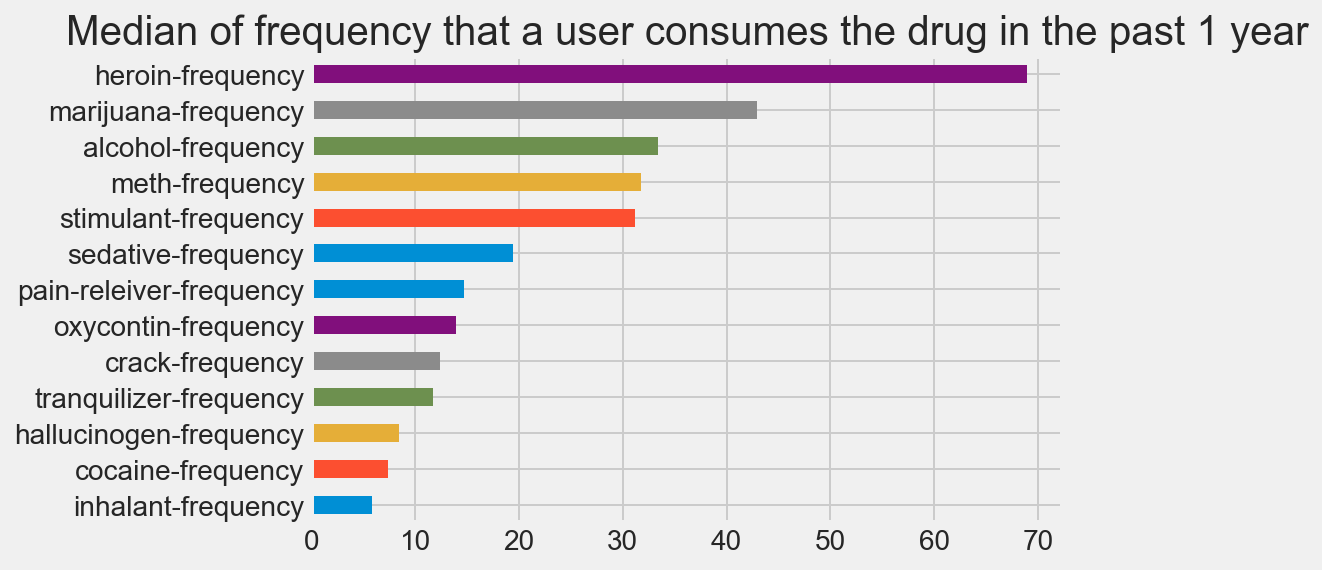

In [1002]:
graph4 = drug_by_age_freq.mean().sort_values().plot.barh()
graph4.set_title('Median of frequency that a user consumes the drug in the past 1 year')

Text(0.5,1,'Stacked histogram Heroin and Marijuana Frequency')

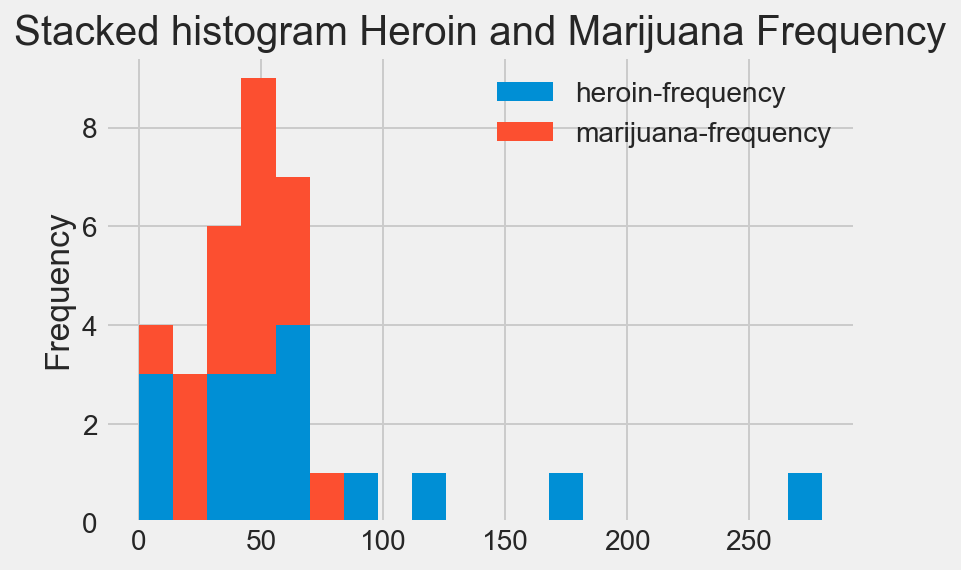

In [1010]:
Hist2 = drug_by_age[['heroin-frequency','marijuana-frequency']].plot.hist(bins=20,stacked=True)
Hist2.set_title('Stacked histogram Heroin and Marijuana Frequency')

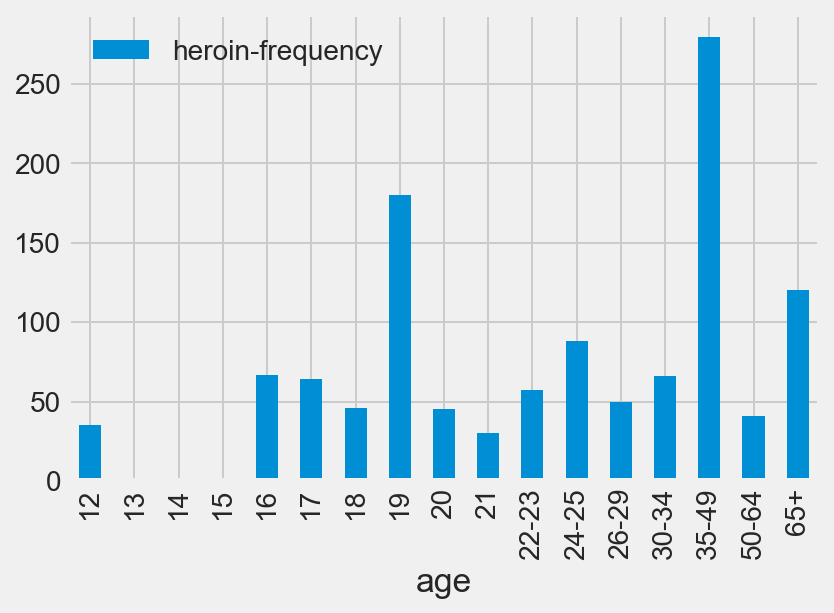

In [1014]:
drug_by_age[['heroin-frequency']].plot.bar()

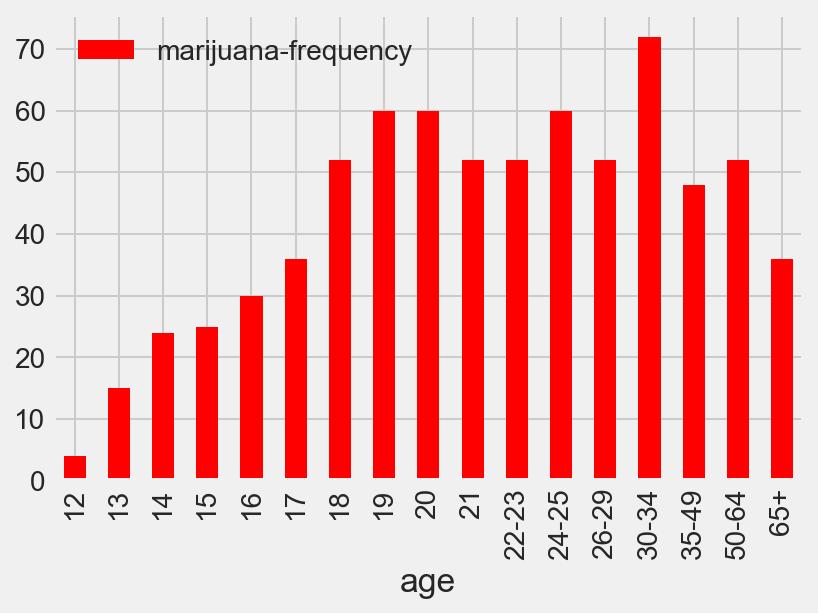

In [1017]:
drug_by_age[['marijuana-frequency']].plot.bar(color='red')

# Analysis Report

On the % of Americans in each group consuming various drugs

1. Taking the mean across the various age groups in the survey sample, the most widely consumed drugs are Alcohol(55%), Marijuana(19%) and Pain Relievers.
2. From the sample, the majority of americans that had consumed drugs are aged between 17 to 23.
3. From the sample, Americans aged 21 has a lower % consuming pain reliever, crack, oxycontin and stimulant use as compared to 1 year younger/older 

On the frequency in each group consuming various drugs

1. Top frequencies - Heroin,Marijuana and alcohol
2. Frequency of each age group consuming marijuana is similiar but for consuming heroin differs widely
3. For heroin, americans from age group 19 (180/year), 35-49(280) has the highest consumption frequency -> specific addicts
4. For Marijuana, americans between the age group of 18 to 64 shows similiar consumption frequency -> widespread addicts

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [1052]:
# H0: The mean % of americans consuming drugs in age group 21 is equal mean % of americans in age group 20 and 22-23

AGE21 = drug_by_age_use.loc['21',:]
AGE1823 = drug_by_age_use.loc[['20','22-23'],:].mean()
stats.ttest_ind(AGE21, AGE1823)

Ttest_indResult(statistic=0.048671796981058578, pvalue=0.96158363509217426)

# Test concludes that the 2 groups are not statistically different

In [1103]:
# H1: The mean % of americans consuming the below drugs in age group 21 is equal mean % of americans in age group 20 and 22-23
# Pain reliever, crack, oxycontin and stimulant use

AGE21 = drug_by_age_use.loc['21',['pain-releiver-use','oxycontin-use','crack-use','stimulant-use']]
AGE1823 = drug_by_age_use.loc[['20','22-23'],['pain-releiver-use','oxycontin-use','crack-use','stimulant-use']].mean()
stats.ttest_ind(AGE21, AGE1823)

Ttest_indResult(statistic=-0.10087234197462064, pvalue=0.92293811862901465)

# Test concludes that the 2 groups are not statistically different

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### Ans 8 as follows:
2. Rate has no outliers. Outliers are defined as observations having a 1.5 X Interquartile Range distance away from the 25th or 75th quartile.

In [1055]:
df2.describe()

,Rate,Verbal,Math,Diff_V_M
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [1056]:
lower_range = 9-(1.5*(63-9))
higher_range = 63+(1.5*(63-9))
print(lower_range)
print(higher_range)

-72.0
144.0


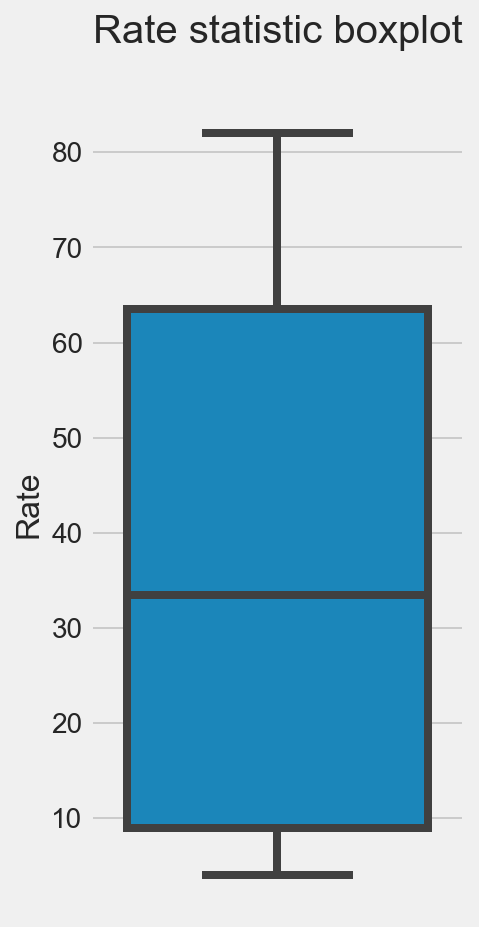

In [1108]:
fig = plt.figure(figsize=(3,7))

ax = sns.boxplot(df2_by_Rate, orient='v')

ax.set_ylabel('Rate', fontsize=16)
ax.set_title('Rate statistic boxplot\n', fontsize=20)

plt.show()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### Ans 9.1.1 

1. The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables. Based on the observations below, the spearman correlation results are higher.
2. Create additional columns to calculate the rank of the values within Verbal and Math respectively. Calculate the correlation of the 2 newly created ranked variables

In [1058]:
df2[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


In [1059]:
df2[['Verbal','Math']].corr(method='pearson')

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [1100]:
df2['Rate_percentile'] = df2['Rate'].apply(lambda x: stats.percentileofscore(df2['Rate'],x,kind='rank'))
df2.head()

,State,Rate,Verbal,Math,Diff_V_M,Rate_percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [1061]:
df2[df2['State'] == 'CA']

,State,Rate,Verbal,Math,Diff_V_M,Rate_percentile
23,CA,51,498,517,-19,56.730769


### Ans 3 - A part of the formula involves computing the diff in the percentiles of each variable

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

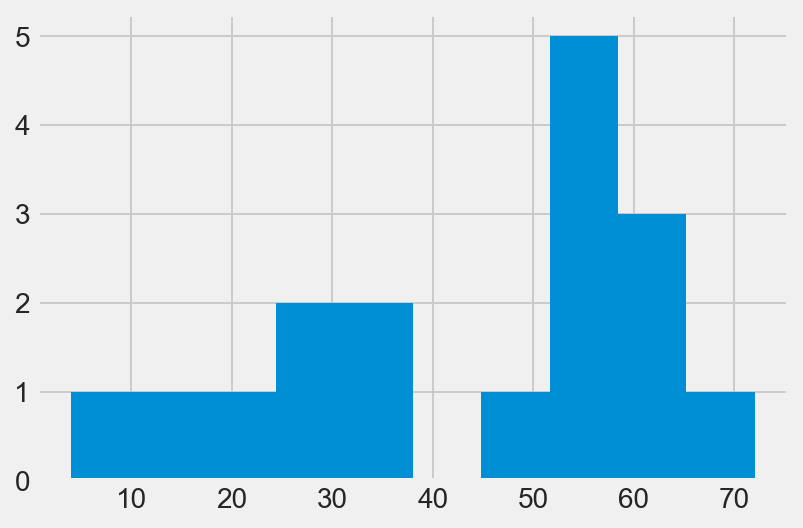

In [1102]:
df4 = drug_by_age_freq
df4['marijuana-frequency'].hist()

In [1087]:
df4['Rate_percentile'] = df4['marijuana-frequency'].apply(lambda x: stats.percentileofscore(df4['marijuana-frequency'],x,kind='rank'))

/Users/bokshenggan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


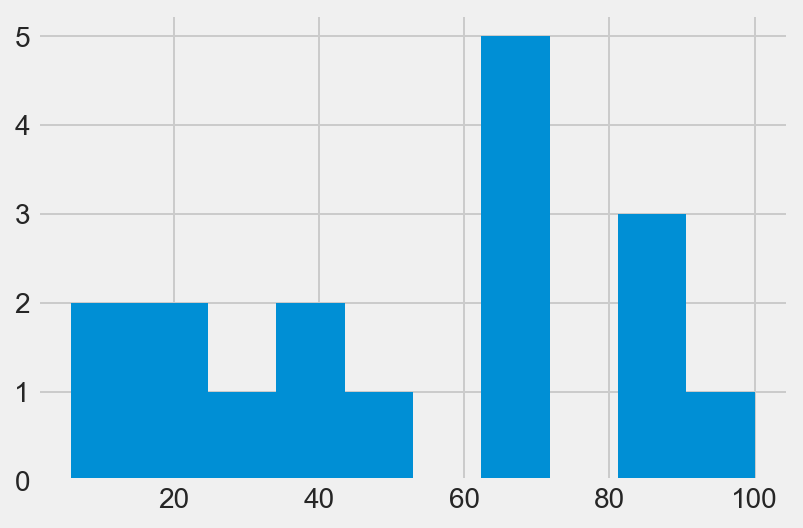

In [1092]:
df4['Rate_percentile'].hist()